# Wine Quality Prediction

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the data
df = pd.read_csv("WineQT.csv")
df.shape

(1143, 13)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# checking the values in target variable
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [33]:
# checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.drop(["Id"], axis = 1,inplace = True)

In [8]:
# checking for statistical measurements of data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Visualization

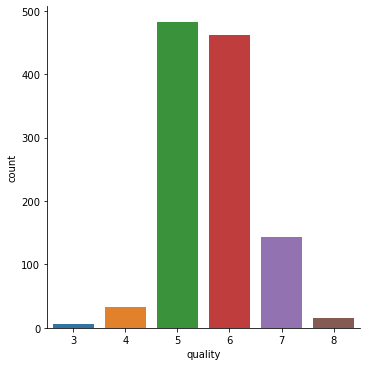

In [9]:
sns.catplot(x = 'quality', data = df, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

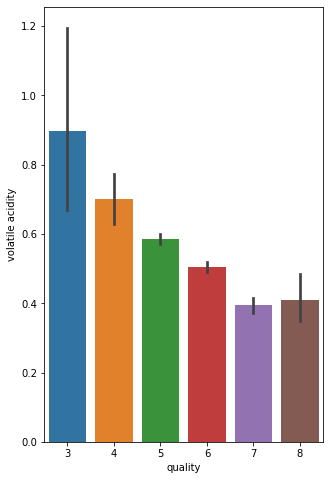

In [10]:
plt.figure(figsize = (5,8))
sns.barplot(x = 'quality',y = 'volatile acidity', data = df)

In [11]:
# for high volatile acidity the quality is low so these both are inversely proportional to each other

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

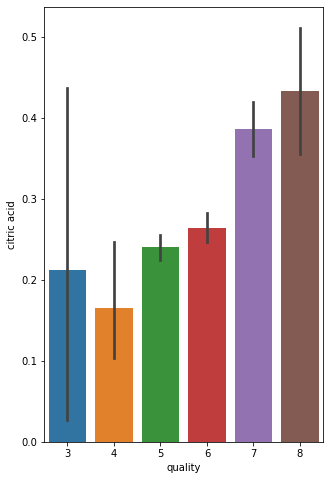

In [12]:
plt.figure(figsize = (5,8))
sns.barplot(x = 'quality',y = 'citric acid',data = df)

In [13]:
# Here it is known that to get good quality wine the citric acid content should be high

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

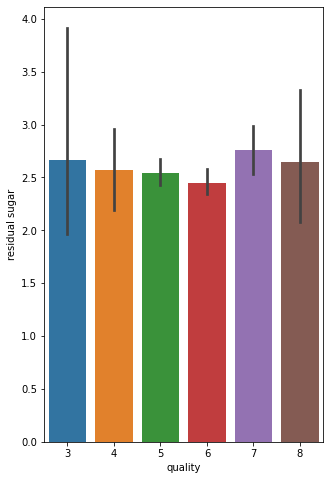

In [14]:
plt.figure(figsize = (5,8))
sns.barplot(x = 'quality',y = 'residual sugar',data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

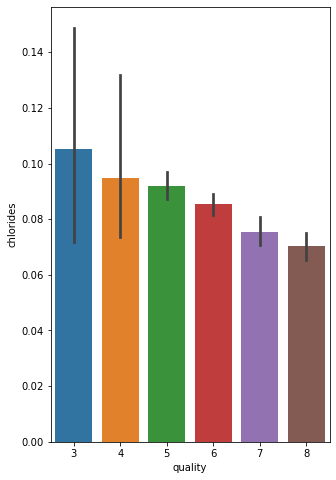

In [15]:
plt.figure(figsize = (5,8))
sns.barplot(x = 'quality',y = 'chlorides',data = df)

In [16]:
# chlorides is inversely proportional to quality

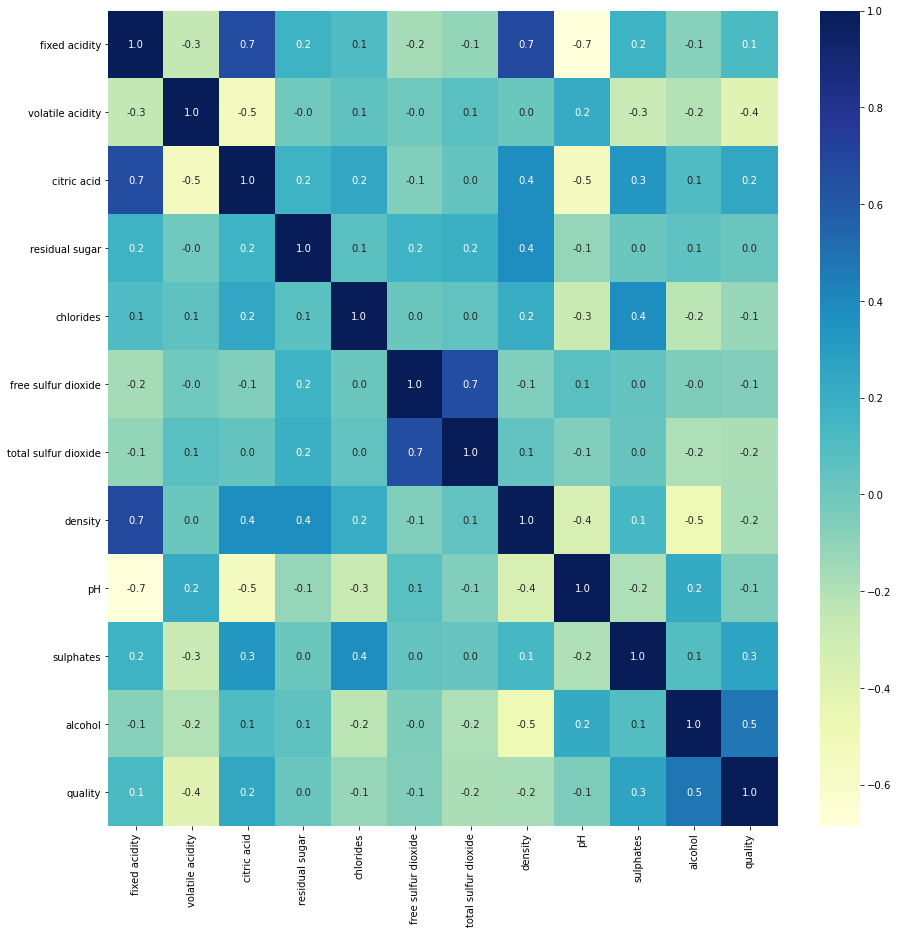

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", fmt = '.1f')
plt.show()

In [18]:
# we have high positive correlation with citric acid, sulphates, alcohol and negative correlation with volatile acidity

In [19]:
# separate the data and label
X = df.drop('quality',axis = 1)
Y = df['quality']

In [20]:
X.shape

(1143, 11)

In [21]:
# label binarization for quality 
Y = df['quality'].apply(lambda y_value : 1 if y_value >= 7 else 0)

In [22]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


In [23]:
Y.value_counts()

0    984
1    159
Name: quality, dtype: int64

# splitting the data

In [24]:
# splitting data into train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)
print(X_train.shape,X_test.shape)

(914, 11) (229, 11)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train,Y_train)


RandomForestClassifier()

# Model Evaluation

In [30]:
# Accuracy score
X_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(X_test_pred,Y_test)
print("Accuracy score on test data is: ",test_data_acc)

Accuracy score on test data is:  0.9126637554585153


In [31]:
# Building a predictive system
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predcting the label for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")



[0]
Bad Quality Wine


In [32]:
# Building a predictive system
input_data = (8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5)

# changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predcting the label for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

[1]
Good Quality Wine
